We import the Revenues.csv into R and we use the function tclean() for replacing the outlier. Then we plot again the Revenues series and the ACF and PACF plots.

In [1]:
#----setup---------
 library(forecast)

In [2]:
# import the Revenues.csv file
 revenues = read.csv("C:\\Revenues.csv")

In [3]:
#------ identify and replace the outliers from the time series----
 rev = tsclean(ts(revenues[,2]))

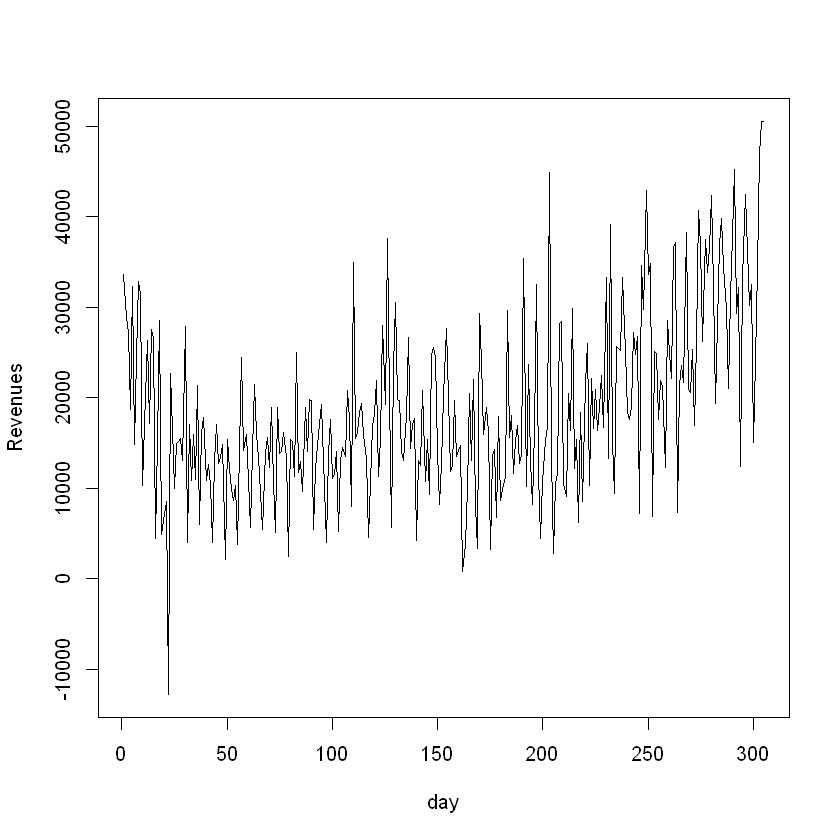

In [4]:
#---- plot the time series----
 plot(rev, xlab="day", ylab="Revenues")

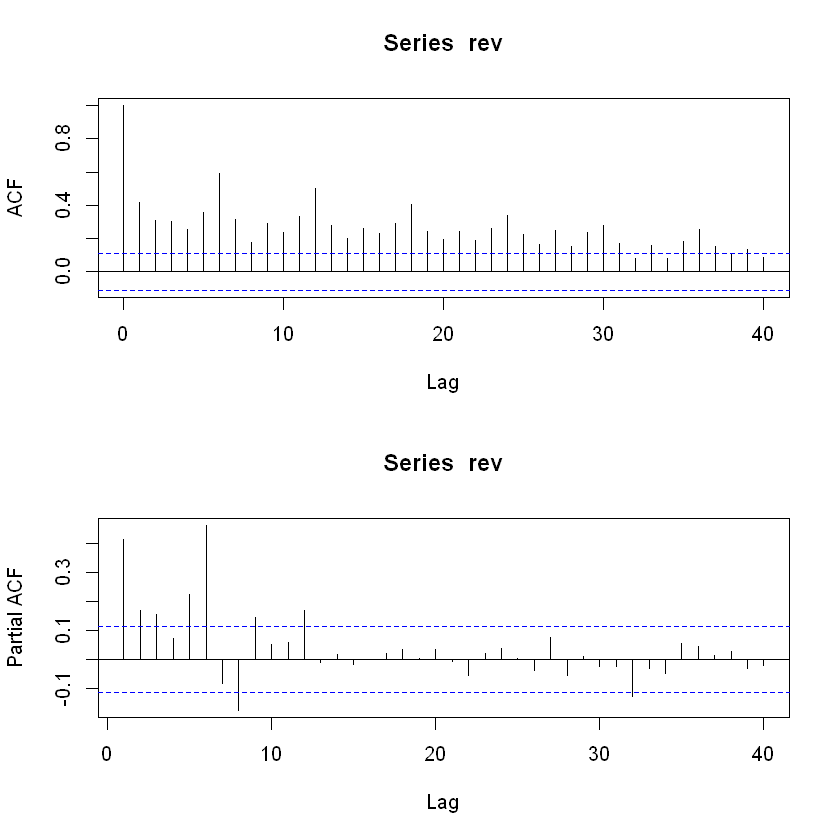

In [5]:

#---ACF and PACF plots-------
 par(mfrow = c(2, 1))
 acf(rev, 40)
 pacf(rev, 40)

Then we will difference the data for eliminating the trend. For this purpose we will take
the first difference.

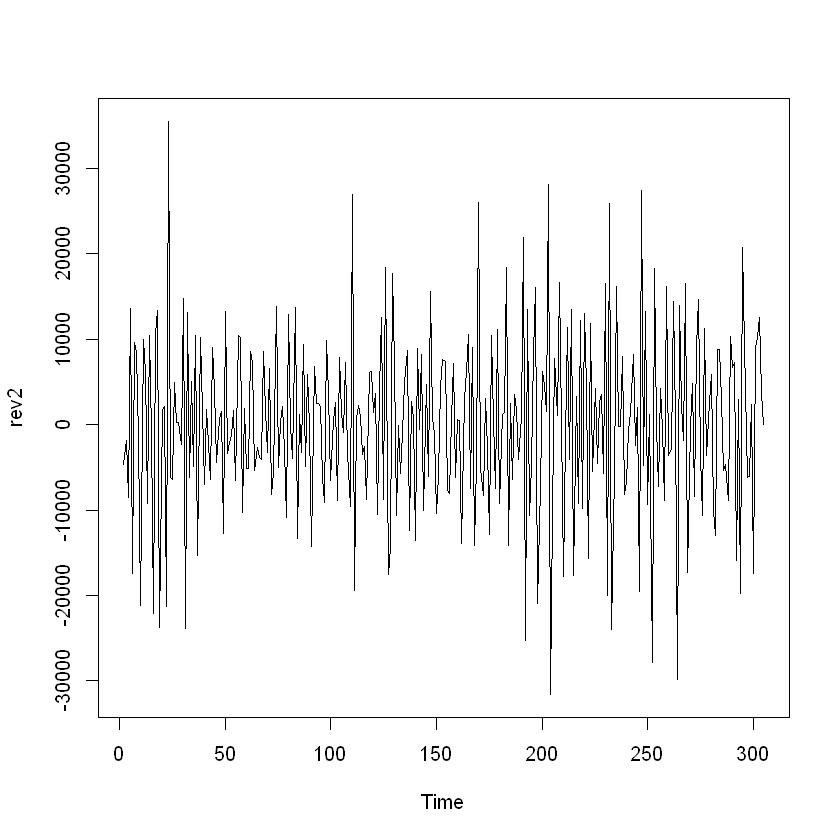

In [6]:
#--first difference plot---
 rev2 = diff(rev)
 par(mfrow = c(1, 1))
 plot(rev2)

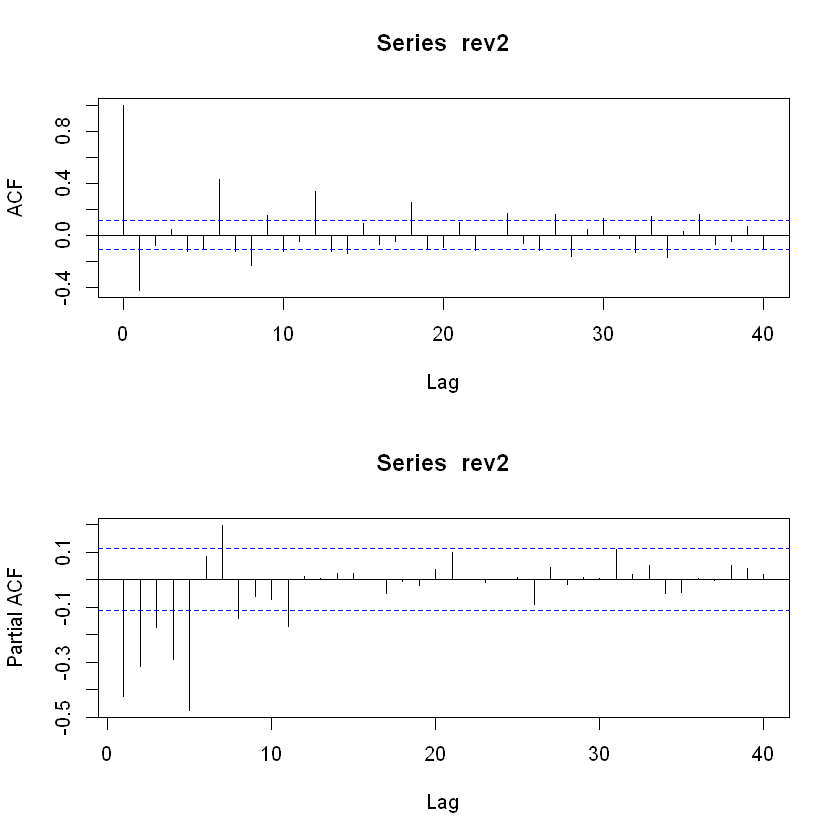

In [7]:
#----ACF and PACF from first difference
 par(mfrow = c(2, 1))
 acf(rev2, 40)
 pacf(rev2, 40)

We can see from the ACF plot that we have peaks at 6, 12, 18 suggested a seasonal model at lag 6. The ACF and PACF plots suggest either a seasonal moving average of order Q =0 and a seasonal autoregression of possible order P = 1, or of order Q=0 and P=2. The ACF and PACF plots at the within season lags are tailing off. This result indicates that we should consider fitting a model with both p = 1 and q = 1. An alternative choice is p = 1 and q=0.

In [8]:
#------ fit the first model-----
 rev5.fit3 = arima(rev, order=c(1,1,1), seasonal=list(order=c(2,0,0), period=6))
 rev5.fit3


Call:
arima(x = rev, order = c(1, 1, 1), seasonal = list(order = c(2, 0, 0), period = 6))

Coefficients:
         ar1      ma1    sar1    sar2
      0.1020  -0.9420  0.3709  0.2176
s.e.  0.0622   0.0233  0.0592  0.0593

sigma^2 estimated as 50898862:  log likelihood = -3130.25,  aic = 6270.49

In [9]:
#----fit the second model----
 rev6.fit3 = arima(rev, order=c(1,1,0), seasonal=list(order=c(1,0,0), period=6))
 rev6.fit3


Call:
arima(x = rev, order = c(1, 1, 0), seasonal = list(order = c(1, 0, 0), period = 6))

Coefficients:
          ar1    sar1
      -0.5227  0.5403
s.e.   0.0494  0.0493

sigma^2 estimated as 65695151:  log likelihood = -3168.65,  aic = 6343.29

In [10]:
#----fit the third model----
 rev7.fit3 = arima(rev, order=c(1,1,1), seasonal=list(order=c(1,0,0), period=6))
 rev7.fit3


Call:
arima(x = rev, order = c(1, 1, 1), seasonal = list(order = c(1, 0, 0), period = 6))

Coefficients:
         ar1      ma1    sar1
      0.1072  -0.9381  0.4636
s.e.  0.0616   0.0217  0.0549

sigma^2 estimated as 53249922:  log likelihood = -3136.82,  aic = 6281.64

We prefer the ARIMA(1,1,1)X(2,0,0)6 model because it has the smallest AIC.

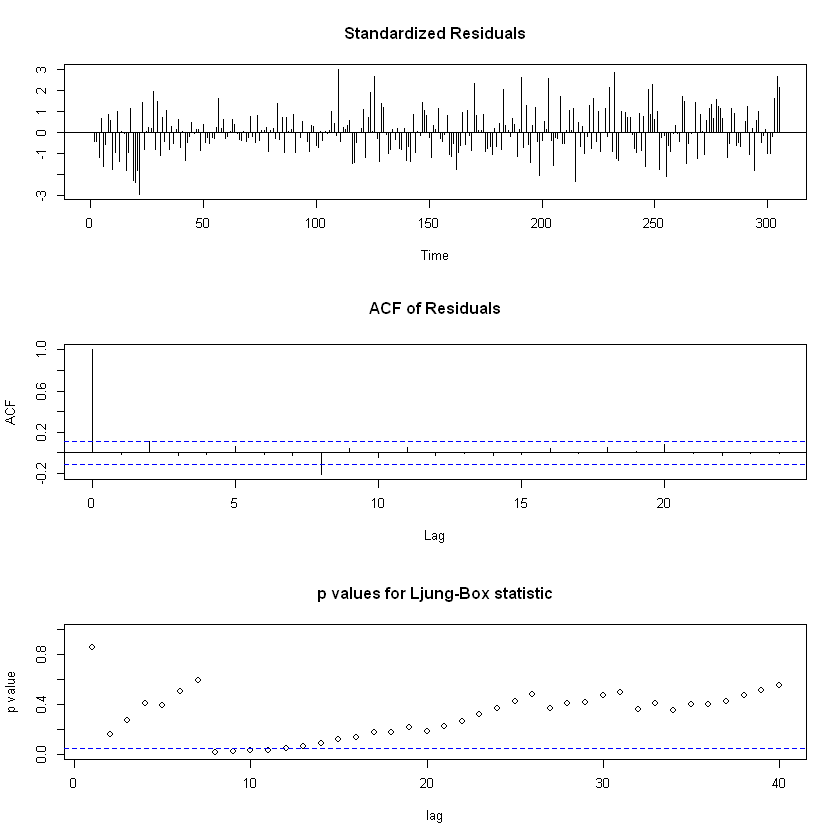

In [11]:
#------diagnostics--------
 tsdiag(rev5.fit3, gof.lag=40)


	Shapiro-Wilk normality test

data:  rev5.fit3$resid
W = 0.99124, p-value = 0.06662


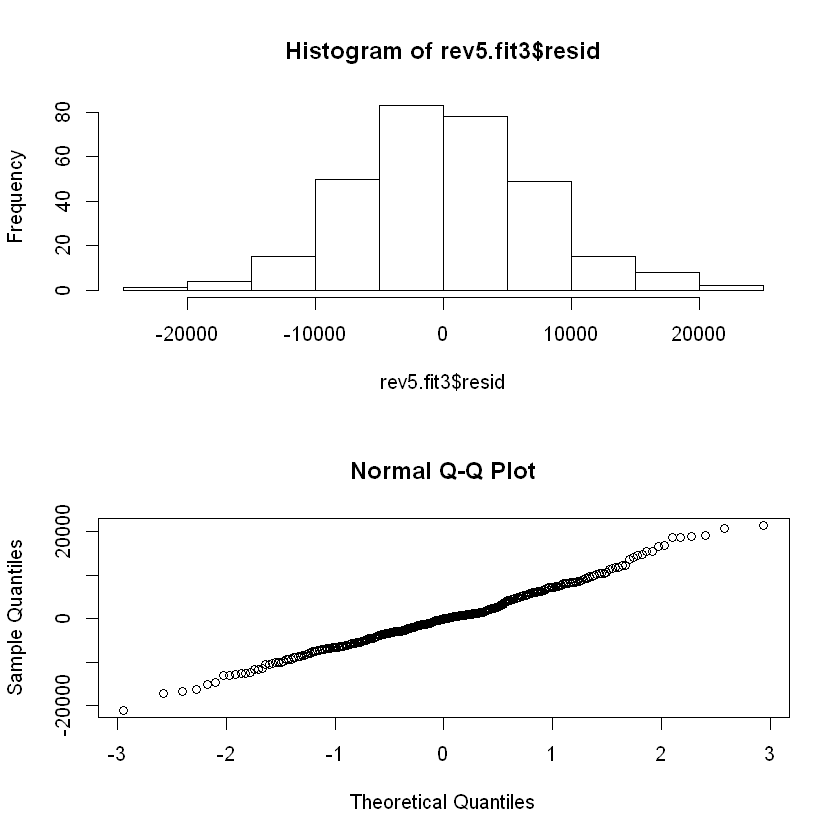

In [12]:
 par(mfrow = c(2,1))
 hist(rev5.fit3$resid, br=12)
 qqnorm(rev5.fit3$resid)
 shapiro.test(rev5.fit3$resid)

The time plot of the standardized residuals shows no obvious patterns. The ACF of the standardized residuals show no departure of the model assunptions and the Q-statistic is never significant at the lags shown. Finally, the histogram and the normal Q-Q plot of the residuals show that the residuals are close to normality except for a few extreme values in the tails. The Shapiro-Wilk test yields a p-value of 0.06662 which indicates that it is possible that the residuals are normal.

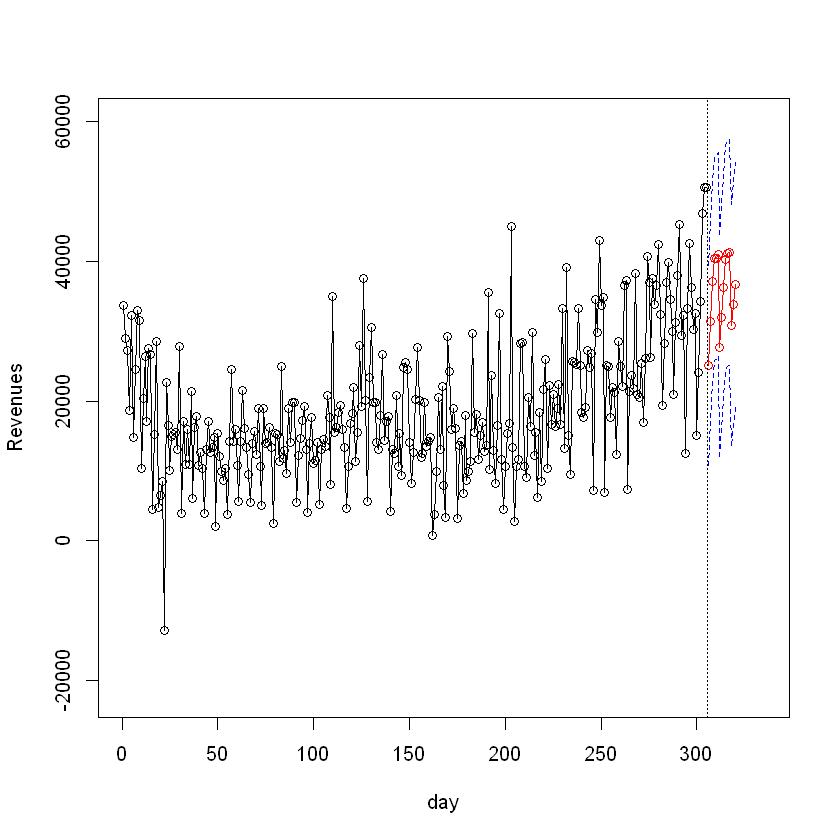

In [13]:
#-------forecast for the final model
 rev5.pr = predict(rev5.fit3, n.ahead=15)
 U = rev5.pr$pred + 2*rev5.pr$se
 L = rev5.pr$pred - 2*rev5.pr$se
 day = 1:305
 plot(day, rev[day], type="o", xlim=c(1,335), ylim=c(-22000, 60000), ylab="Revenues")
 lines(rev5.pr$pred, col="red", type="o")
 lines(U, col="blue",lty="dashed")
 lines(L, col="blue",lty="dashed")
 abline(v=305.5,lty="dotted")

In [14]:
#------- the predicted values and upper and lower limits
 rev5.pr$pred

Time Series:
Start = 306 
End = 320 
Frequency = 1 
 [1] 25080.78 31427.81 37063.61 40361.83 40419.65 40921.08 27688.70 31999.54
 [9] 36301.67 40261.55 41092.49 41278.45 30827.26 33806.90 36628.56

In [15]:
 U

Time Series:
Start = 306 
End = 320 
Frequency = 1 
 [1] 39349.47 45878.16 51552.87 54881.31 54968.48 55499.12 43535.81 47945.11
 [9] 52301.43 56311.58 57192.28 57427.80 48173.27 51276.61 54175.17

In [16]:
 L

Time Series:
Start = 306 
End = 320 
Frequency = 1 
 [1] 10812.09 16977.46 22574.35 25842.34 25870.82 26343.04 11841.59 16053.97
 [9] 20301.91 24211.51 24992.70 25129.09 13481.25 16337.19 19081.94

A forecasting for the next 15 days is presented. The predicted revenue for the next day order (306th day) is 25080 with the upper limit = 39349 and the lower limit = 10812.